In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))

In [3]:
#alterar eleitores por eleição

eleitores = 83817593

In [40]:
names = ['TRASH1', 'TRASH3', 'TRASH2','NR_TURNO', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'NM_URNA_CANDIDATO',
'DS_CARGO', 'TRASH13', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH19', 'TRASH20', 'SG_PARTIDO', 'TRASH18', 'TRASH21',
 'TRASH22','TRASH23','QT_VOTOS_NOMINAIS']

In [41]:
df = pd.read_csv('VOTACAO_CANDIDATO_UF_1989.txt', names = names, sep = ';', encoding='latin-1')

In [42]:
df.sample(1)

,TRASH1,TRASH3,TRASH2,NR_TURNO,TRASH4,TRASH5,TRASH6,TRASH7,TRASH8,TRASH9,TRASH10,NM_URNA_CANDIDATO,DS_CARGO,TRASH13,TRASH14,TRASH15,TRASH16,TRASH17,TRASH19,TRASH20,SG_PARTIDO,TRASH18,TRASH21,TRASH22,TRASH23,QT_VOTOS_NOMINAIS
292,5/11/2012,17:09:00,1989,1,ELEIÇÕES 1989,RR,BR,1,27,-3,LIVIA MARIA LEDO PIO DE ABREU,LIVIA MARIA,PRESIDENTE,-3,#NE#,2,DEFERIDO,4,NÃO ELEITO,27,PN,PARTIDO NACIONAL,-3,#NULO#,#NULO#,179


In [44]:

droplist = ['TRASH1', 'TRASH2', 'TRASH3', 'TRASH4',
'TRASH5', 'TRASH6', 'TRASH7', 'TRASH8', 'TRASH9', 'TRASH10', 'TRASH13', 'TRASH14', 'TRASH15',
'TRASH16', 'TRASH17', 'TRASH18', 'TRASH19', 'TRASH20', 'TRASH21', 'TRASH22','TRASH23']




In [45]:
df = df.drop(droplist, axis = 1)

In [46]:
df.sample(2)

,NR_TURNO,NM_URNA_CANDIDATO,DS_CARGO,SG_PARTIDO,QT_VOTOS_NOMINAIS
266,1,GABEIRA,PRESIDENTE,PV,1063
301,1,LIVIA MARIA,PRESIDENTE,PN,6320


### Filtro por Cargo

In [47]:
dfpresidente = df[df.DS_CARGO == 'PRESIDENTE']

# Primeiro Turno

In [48]:
#Escolher Turno
dfpresidente1turno = dfpresidente[dfpresidente.NR_TURNO == 1]
#Grupar por
votostotais1turno = dfpresidente1turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais1turno['Porcentagem'] = votostotais1turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais1turno = votostotais1turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v1 = votostotais1turno.QT_VOTOS_NOMINAIS.sum()

In [49]:
#Criação de Outros e mostrando somente os 5 primeiros

outros1 = votostotais1turno.QT_VOTOS_NOMINAIS[5:100].sum()
outros1p = votostotais1turno.Porcentagem[5:100].sum()

votostotais1turno = votostotais1turno[0:5].append({'SG_PARTIDO' : 'Outros' , 'NM_URNA_CANDIDATO' : 'Outros', 'QT_VOTOS_NOMINAIS' : outros1, 'Porcentagem' : outros1p } , ignore_index=True)

votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PRN,COLLOR,20611030,24.590339
1,PT,LULA,11622321,13.866207
2,PDT,BRIZOLA,11167665,13.323772
3,PSDB,MARIO COVAS,7790381,9.294446
4,PDS,MALUF,5986585,7.142397
5,Outros,Outros,10447904,12.465049


([<matplotlib.patches.Wedge at 0x1350164aa88>,
 [Text(-0.6273437183079451, -0.9035706165538817, 'Votos Totais'),
  Text(0.6843748731376973, 0.985713463952766, 'Não Votaram')],
 [Text(-0.34218748271342453, -0.49285669993848086, '80.7%'),
  Text(0.39921867599699, 0.5749995206391134, '19.3%')])

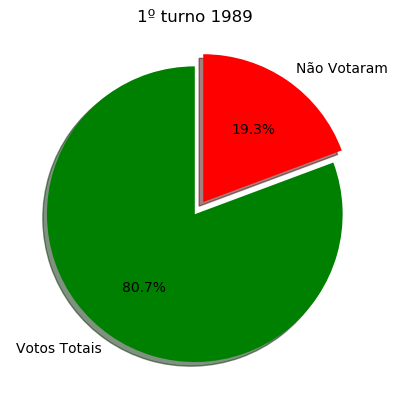

In [51]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = 'Votos Totais', 'Não Votaram'
sizes = [v1, (eleitores-v1)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('1º turno 1989')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)


([<matplotlib.patches.Wedge at 0x1350169cc88>,
 [Text(-0.9813029302397901, 0.6906841239689834, 'COLLOR'),
  Text(-0.6973720350018561, -0.8506892762915084, 'LULA'),
  Text(0.3998659482641677, -1.0247473949314525, 'BRIZOLA'),
  Text(1.1398150685743493, -0.37526205437114435, 'MARIO COVAS'),
  Text(1.6126479594053502, 0.5379280240197201, 'MALUF'),
  Text(0.7464463898106111, 1.415209449918529, 'Outros')],
 [Text(-0.5724267093065442, 0.4028990723152403, '30.5%'),
  Text(-0.3803847463646487, -0.46401233252264085, '17.2%'),
  Text(0.2181086990531824, -0.5589531245080649, '16.5%'),
  Text(0.664892123335037, -0.21890286504983417, '11.5%'),
  Text(1.1383397360508354, 0.3797138993080377, '8.9%'),
  Text(0.5131818929947951, 0.9729564968189885, '15.4%')])

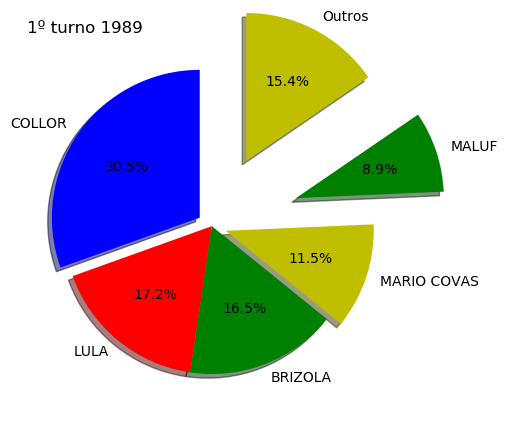

In [52]:
#Grafico de Pizza
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.1, 0.0, 0.0, 0.1, 0.6, 0.5)
colors = ('b', 'r', 'g', 'y', 'g', 'y')

plt.pyplot.title('1º turno 1989', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)


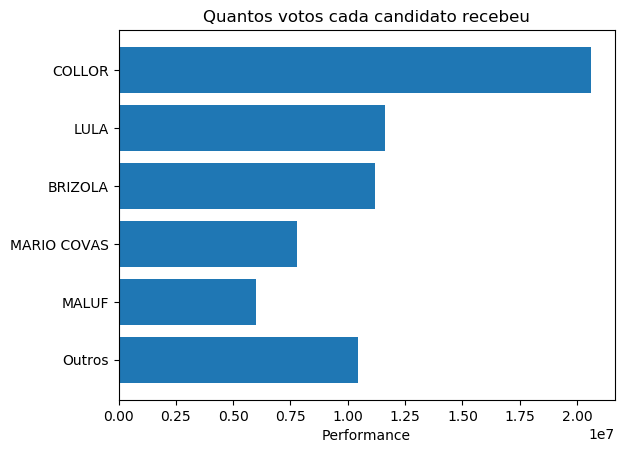

In [53]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [54]:
votostotais1turno = votostotais1turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v1), 
                                              'Porcentagem' : 100-votostotais1turno.Porcentagem.sum() } , ignore_index=True)
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PRN,COLLOR,20611030,24.590339
1,PT,LULA,11622321,13.866207
2,PDT,BRIZOLA,11167665,13.323772
3,PSDB,MARIO COVAS,7790381,9.294446
4,PDS,MALUF,5986585,7.142397
5,Outros,Outros,10447904,12.465049
6,Não Votaram,Não Votaram,16191707,19.317790


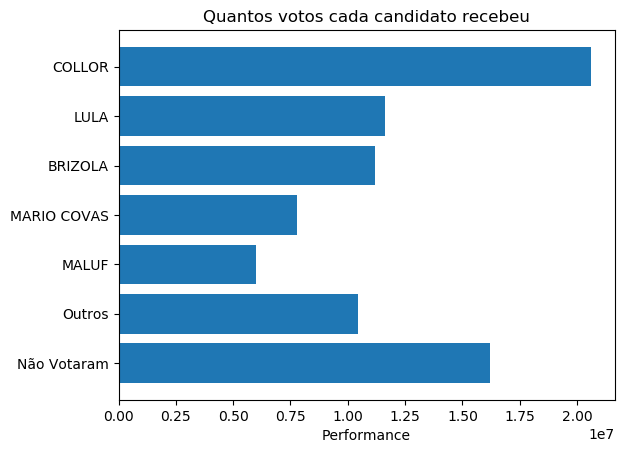

In [55]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x1350191f488>,
 [Text(-0.7677428970548605, 0.787763190319153, 'COLLOR'),
  Text(-1.0088855291133079, -0.43834916350525954, 'LULA'),
  Text(-0.33212456256165324, -1.0486626125419132, 'BRIZOLA'),
  Text(0.4322620470501883, -1.0115085381152158, 'MARIO COVAS'),
  Text(0.8753170180603543, -0.6661982571982079, 'MALUF'),
  Text(1.0993424930611146, -0.03802739736260227, 'Outros'),
  Text(0.6273437183079452, 0.9035706165538816, 'Não Votaram')],
 [Text(-0.4187688529390148, 0.42968901290135614, '24.6%'),
  Text(-0.5503011976981679, -0.23909954373014153, '13.9%'),
  Text(-0.1811588523063563, -0.5719977886592253, '13.3%'),
  Text(0.23577929839101175, -0.5517319298810267, '9.3%'),
  Text(0.4774456462147386, -0.36338086756265886, '7.1%'),
  Text(0.599641359851517, -0.0207422167432376, '12.5%'),
  Text(0.34218748271342464, 0.4928566999384808, '19.3%')])

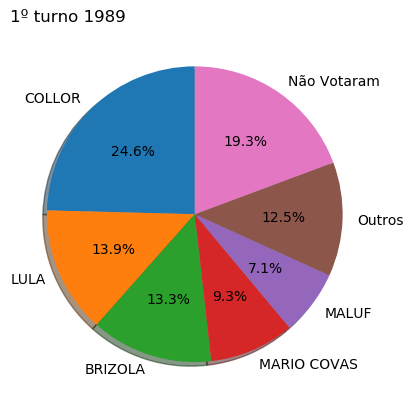

In [57]:
#Grafico de Pizza

labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
# explode = (0.0, 0.1, 0.1

plt.pyplot.title('1º turno 1989', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Segundo Turno

In [59]:
#Escolher Turno
dfpresidente2turno = dfpresidente[dfpresidente.NR_TURNO == 2]
#Grupar por
votostotais2turno = dfpresidente2turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais2turno['Porcentagem'] = votostotais2turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais2turno = votostotais2turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v2 = votostotais2turno.QT_VOTOS_NOMINAIS.sum()

([<matplotlib.patches.Wedge at 0x1350199c7c8>,
 [Text(-0.6758217946299354, -0.8679083487921829, 'Votos Totais'),
  Text(0.7372600509496239, 0.9468091768005622, 'Não Votaram')],
 [Text(-0.36863006979814655, -0.47340455388664515, '78.9%'),
  Text(0.4300683630539472, 0.5523053531336612, '21.1%')])

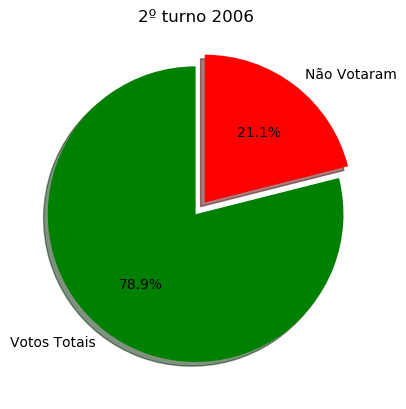

In [60]:
#Grafico de Pizza

labels = 'Votos Totais', 'Não Votaram'
sizes = [v2, (eleitores-v2)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('2º turno 2006')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)

([<matplotlib.patches.Wedge at 0x135019ed7c8>,
 [Text(-1.0950083301809832, -0.10467452810619698, 'COLLOR'),
  Text(1.194554542015618, 0.1141903942976693, 'LULA')],
 [Text(-0.597277271007809, -0.05709519714883471, '53.0%'),
  Text(0.6968234828424439, 0.06661106334030709, '47.0%')])

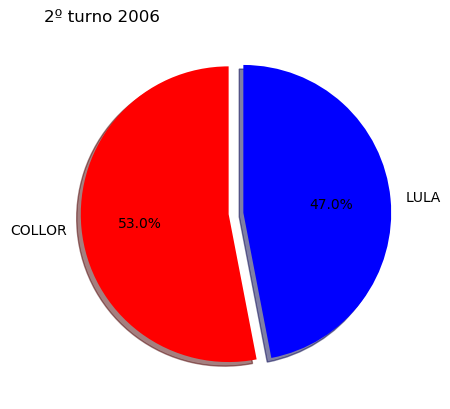

In [61]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1)
colors = ('r','b')

plt.pyplot.title('2º turno 2006', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

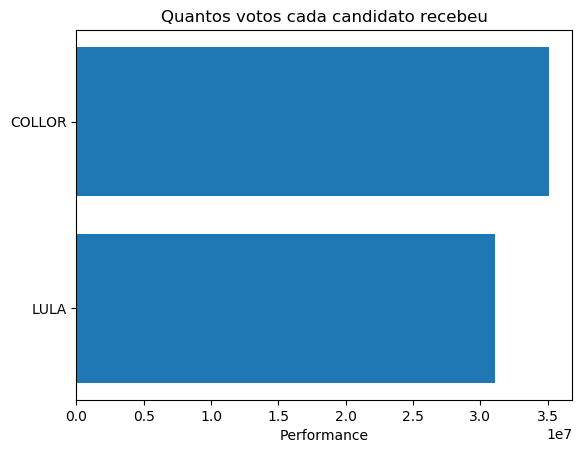

In [62]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [63]:
votostotais2turno = votostotais2turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v2), 
                                              'Porcentagem' : 100-votostotais2turno.Porcentagem.sum() } , ignore_index=True)
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PRN,COLLOR,35090206,41.864965
1,PT,LULA,31075803,37.075513
2,Não Votaram,Não Votaram,17651584,21.059521


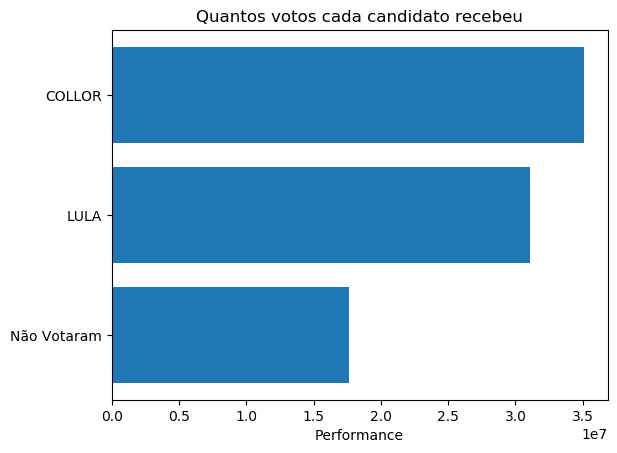

In [64]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x13501cca1c8>,
 [Text(-1.0642713829493509, 0.2780762906741179, 'COLLOR'),
  Text(0.7296791612813696, -0.9526638030237726, 'LULA'),
  Text(0.7372604941829067, 0.9468088316641203, 'Não Votaram')],
 [Text(-0.5805116634269185, 0.151677976731337, '41.9%'),
  Text(0.42564617741413224, -0.5557205517638673, '37.1%'),
  Text(0.43006862160669557, 0.55230515180407, '21.1%')])

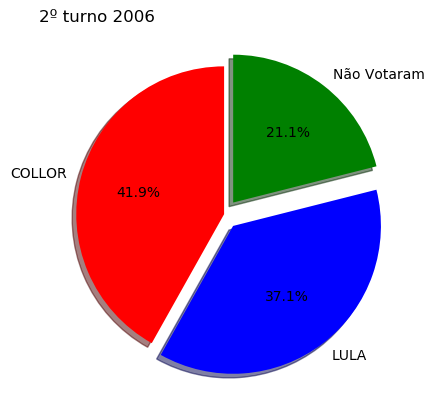

In [65]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1, 0.1)
colors = ('r','b','g')

plt.pyplot.title('2º turno 2006', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

# Salvar os Arquivos CSV

In [66]:
votostotais1turno['Ano'] = 1989
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PRN,COLLOR,20611030,24.590339,1989
1,PT,LULA,11622321,13.866207,1989
2,PDT,BRIZOLA,11167665,13.323772,1989
3,PSDB,MARIO COVAS,7790381,9.294446,1989
4,PDS,MALUF,5986585,7.142397,1989
5,Outros,Outros,10447904,12.465049,1989
6,Não Votaram,Não Votaram,16191707,19.317790,1989


In [67]:
votostotais1turno.to_csv('1turno_1989.csv')

In [68]:
votostotais2turno['Ano'] = 1989
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PRN,COLLOR,35090206,41.864965,1989
1,PT,LULA,31075803,37.075513,1989
2,Não Votaram,Não Votaram,17651584,21.059521,1989


In [69]:
votostotais2turno.to_csv('2turno_1989.csv')